# Import libs

In [1]:
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import sys

sys.path.append('..')
from eFlow.ClusterMaster import *
from eFlow.DataFrameTypes import *
from eFlow.Analysis.DataAnalysis import *
from eFlow.PipelineSegments.DataCleaner import *
from xgboost import XGBClassifier
import ipython_blocking
from pivottablejs import pivot_ui
import scikitplot as skplt

In [2]:
%matplotlib notebook
%matplotlib inline

### Be sure to run the following

## Declare Worflow Variables

#### (This should be the only place you should have to declare anything)

In [3]:
dataset_path = "Datasets/titanic_train.csv"
target_column = "Survived"
parent_project_name = "Pre processing"
prediction_method = "Classification"
notebook_mode = True

# Import dataset

In [4]:
df = pd.read_csv(dataset_path)
display(df.shape)
df.head()

(891, 12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Interaction tool for dataframes

### Explore the data

In [5]:
pivot_ui(df,
         outfile_path='Piviot_Table_JS.html')

In [6]:
# w = widgets.SelectMultiple(
#     options=['Apples', 'Oranges', 'Pears'],
#     value=['Oranges'],
#     #rows=10,
#     description='Fruits',
#     disabled=False
# )
# del w

In [7]:
a = str(u"\u2192")
print(a)

→


## Remove Un-Wanted Columns

### Do not remove nans yet, let the datacleaner do it's job

In [8]:
df.drop(columns=["Name",
                 "Ticket",
                 "PassengerId"],
        inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [9]:
from dateutil import parser
dt = parser.parse("Aug 28 1999 12:00AM")

In [10]:
df["Date_test"] = ["2019-01-02" for _ in range(0,df.shape[0])]
df["Date_test"][0] = np.nan
# df["Date_test"] = [parser.parse(val)for val in df["Date_test"].value_counts().keys()]

/Users/ericcacciavillani/anaconda3/envs/Master_Project/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Basic Feature manipulation

### Change cabin column to have the level on the ship

In [11]:
df["Cabin"] = df["Cabin"].str.replace(r'\d+', '').str[0]

## Change Feature Data types

### Look at data types

In [12]:
df.dtypes

Survived       int64
Pclass         int64
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Cabin         object
Embarked      object
Date_test     object
dtype: object

### Make given data type changes

In [13]:
# df["Pclass"] = df["Pclass"].replace(1, np.nan)

### Final look at data types

In [14]:
df.dtypes

Survived       int64
Pclass         int64
Sex           object
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Cabin         object
Embarked      object
Date_test     object
dtype: object

## Set up DataFrameTypes

In [15]:
df_features = DataFrameTypes(df,
                             target_column=target_column,
                             ignore_nulls=True)

Categorical Features: {'Embarked', 'Cabin', 'Sex'}

Possible One hot encoded feature names: {'Embarked': ['Embarked_S', 'Embarked_Q', 'Embarked_C'], 'Cabin': ['Cabin_B', 'Cabin_D', 'Cabin_T', 'Cabin_F', 'Cabin_E', 'Cabin_C', 'Cabin_G', 'Cabin_A'], 'Sex': ['Sex_male', 'Sex_female']}

------------------------------------------------------------------------------------------
Numerical Features: {'Pclass', 'Fare', 'Age', 'Survived', 'SibSp', 'Parch'}

Integer Features: {'Pclass', 'Parch', 'SibSp', 'Survived'}

Float Features: {'Fare', 'Age'}

Datetime Features: {'Date_test'}

Target Feature: Survived



## Skim through Value Counts

In [16]:
for col in df.columns:
    if col not in df_features.get_float_features() and len(np.unique(df[col].dropna().values)) <= 12:
        display(df[col].value_counts())
        print("***" * 4 + "\n\n")

0    549
1    342
Name: Survived, dtype: int64

************




3    491
1    216
2    184
Name: Pclass, dtype: int64

************




male      577
female    314
Name: Sex, dtype: int64

************




0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

************




0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

************




C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

************




S    644
C    168
Q     77
Name: Embarked, dtype: int64

************




2019-01-02    890
Name: Date_test, dtype: int64

************




### Perform quick analysis

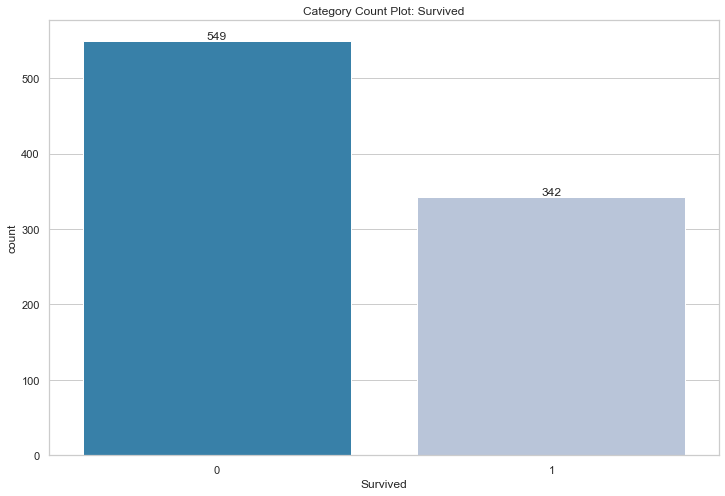

,Unique Values,Counts,Percantage
0,0,549,61.62%
1,1,342,38.38%






--------------------------------------------------------------------------------




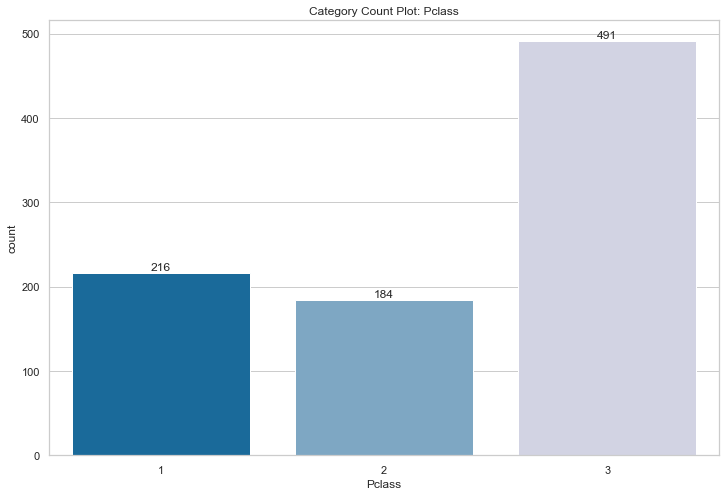

,Unique Values,Counts,Percantage
0,3,491,55.11%
1,1,216,24.24%
2,2,184,20.65%






--------------------------------------------------------------------------------




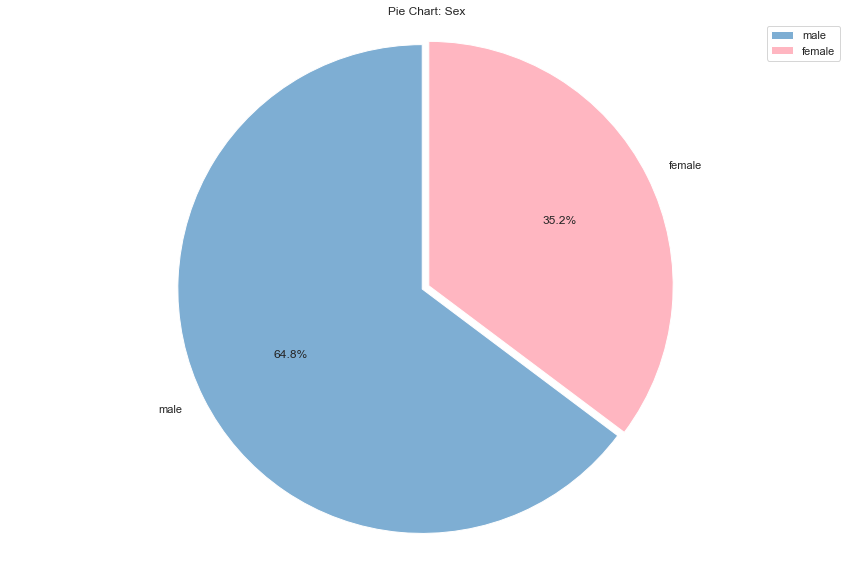

<Figure size 1440x1440 with 0 Axes>

,Unique Values,Counts,Percantage
0,male,577,64.76%
1,female,314,35.24%






--------------------------------------------------------------------------------




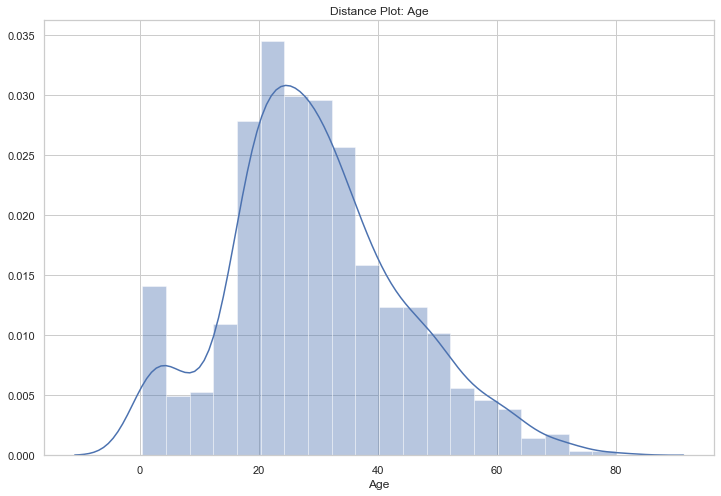

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000
var,211.019125






--------------------------------------------------------------------------------




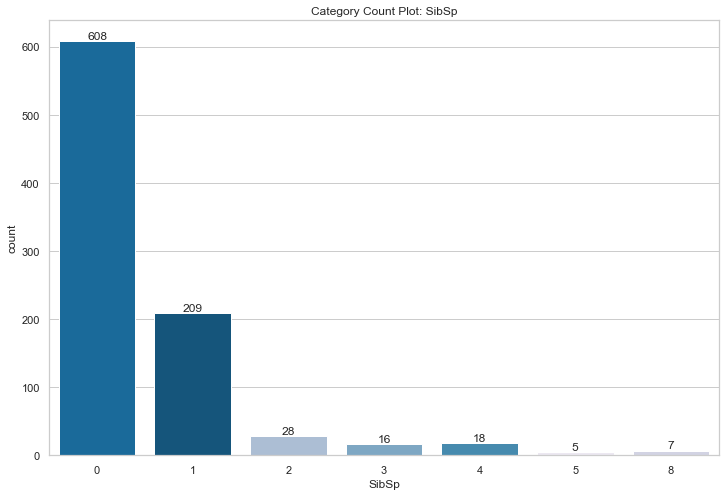

,Unique Values,Counts,Percantage
0,0,608,68.24%
1,1,209,23.46%
2,2,28,3.14%
3,4,18,2.02%
4,3,16,1.80%
5,8,7,0.79%
6,5,5,0.56%






--------------------------------------------------------------------------------




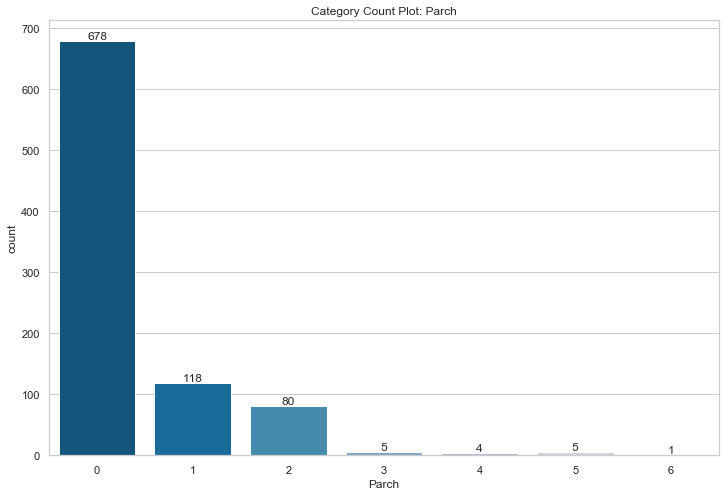

,Unique Values,Counts,Percantage
0,0,678,76.09%
1,1,118,13.24%
2,2,80,8.98%
3,5,5,0.56%
4,3,5,0.56%
5,4,4,0.45%
6,6,1,0.11%






--------------------------------------------------------------------------------




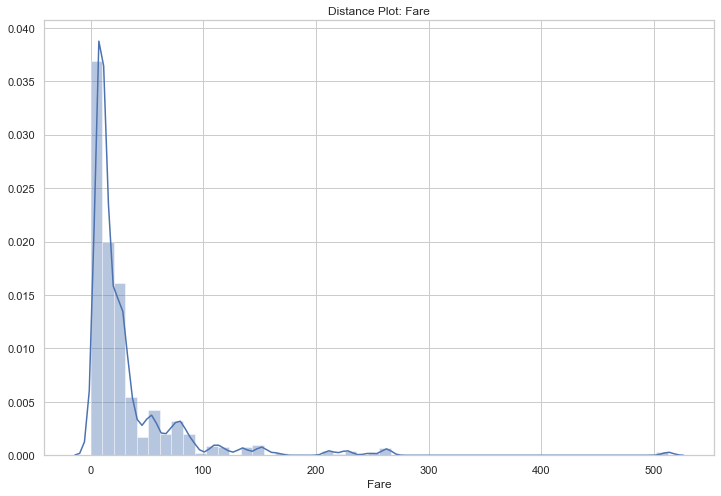

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200
var,2469.436846






--------------------------------------------------------------------------------




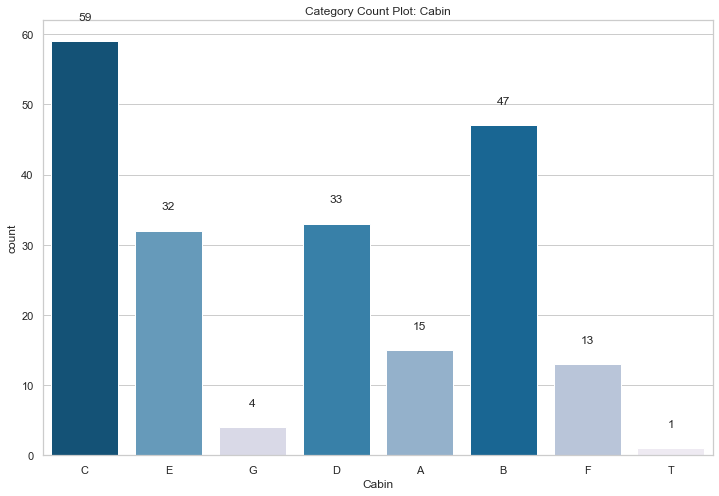

,Unique Values,Counts,Percantage
0,C,59,6.62%
1,B,47,5.27%
2,D,33,3.70%
3,E,32,3.59%
4,A,15,1.68%
5,F,13,1.46%
6,G,4,0.45%
7,T,1,0.11%






--------------------------------------------------------------------------------




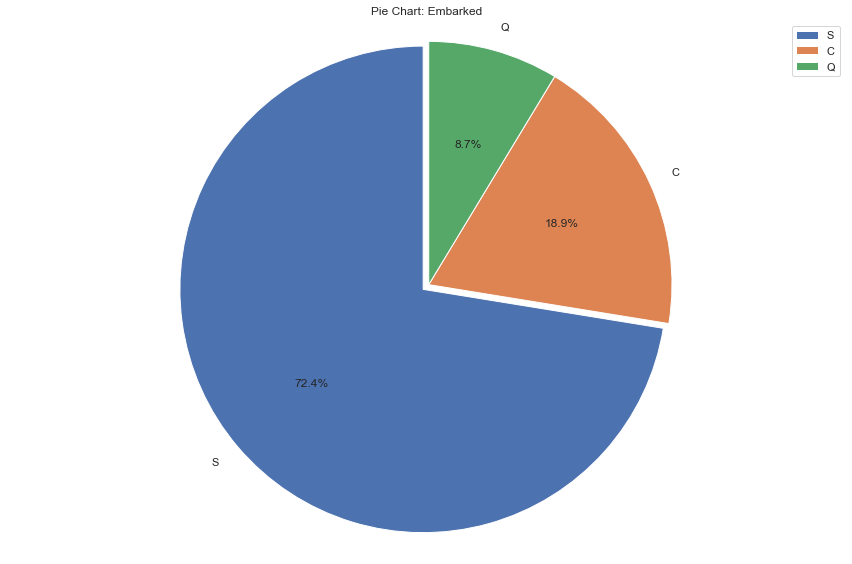

<Figure size 1440x1440 with 0 Axes>

,Unique Values,Counts,Percantage
0,S,644,72.28%
1,C,168,18.86%
2,Q,77,8.64%






--------------------------------------------------------------------------------




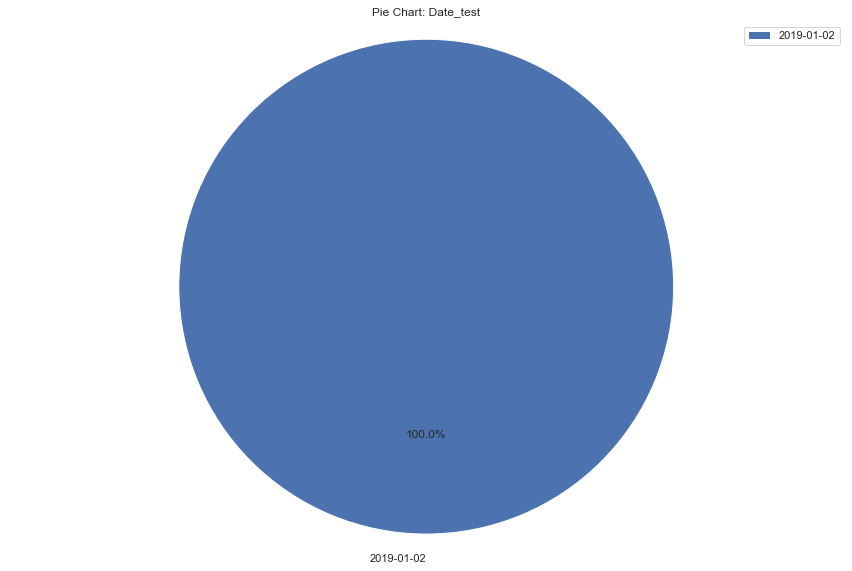

<Figure size 1440x1440 with 0 Axes>

,Unique Values,Counts,Percantage
0,2019-01-02,890,99.89%






--------------------------------------------------------------------------------




In [17]:
analysis_obj = DataAnalysis(df,
                            df_features,
                            project_name=parent_project_name + "/" + "General Analysis (Before Cleaning)",
                            missing_data_visuals=False)

## Data Cleaning

Your selected dataframe has 10 columns.
There are 4 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Date_test,1,0.1


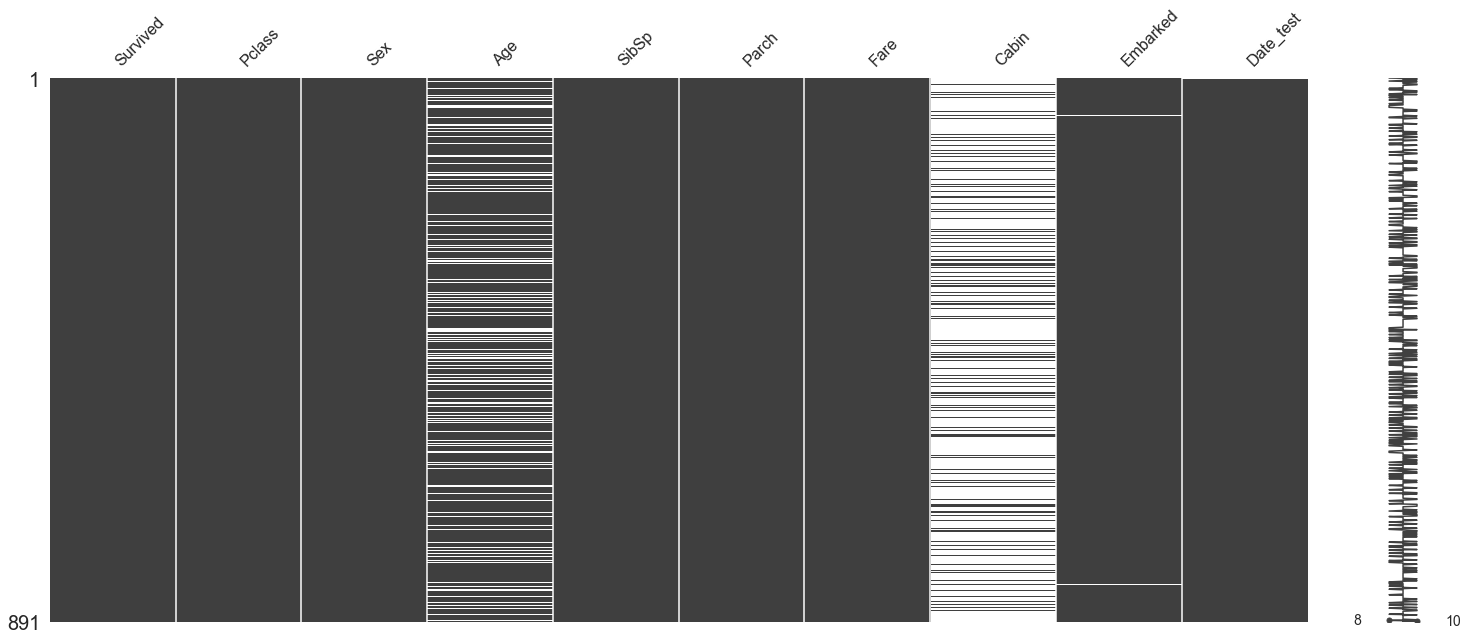

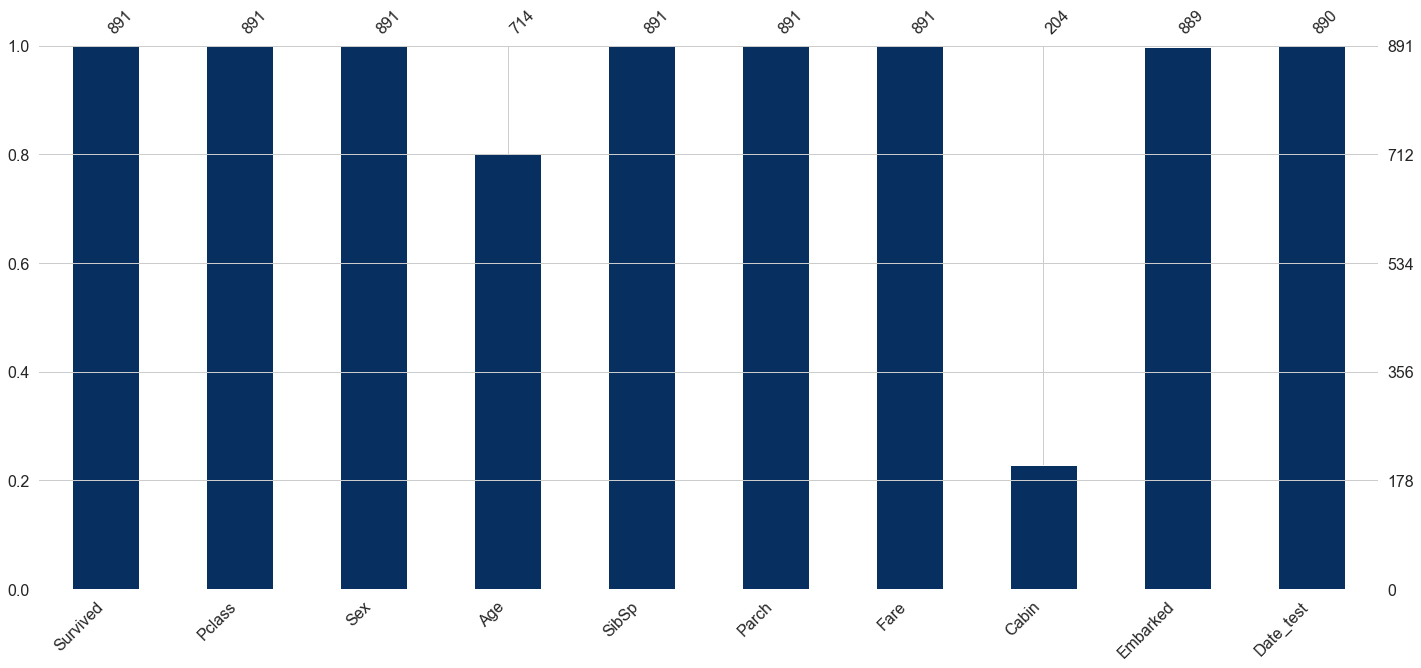

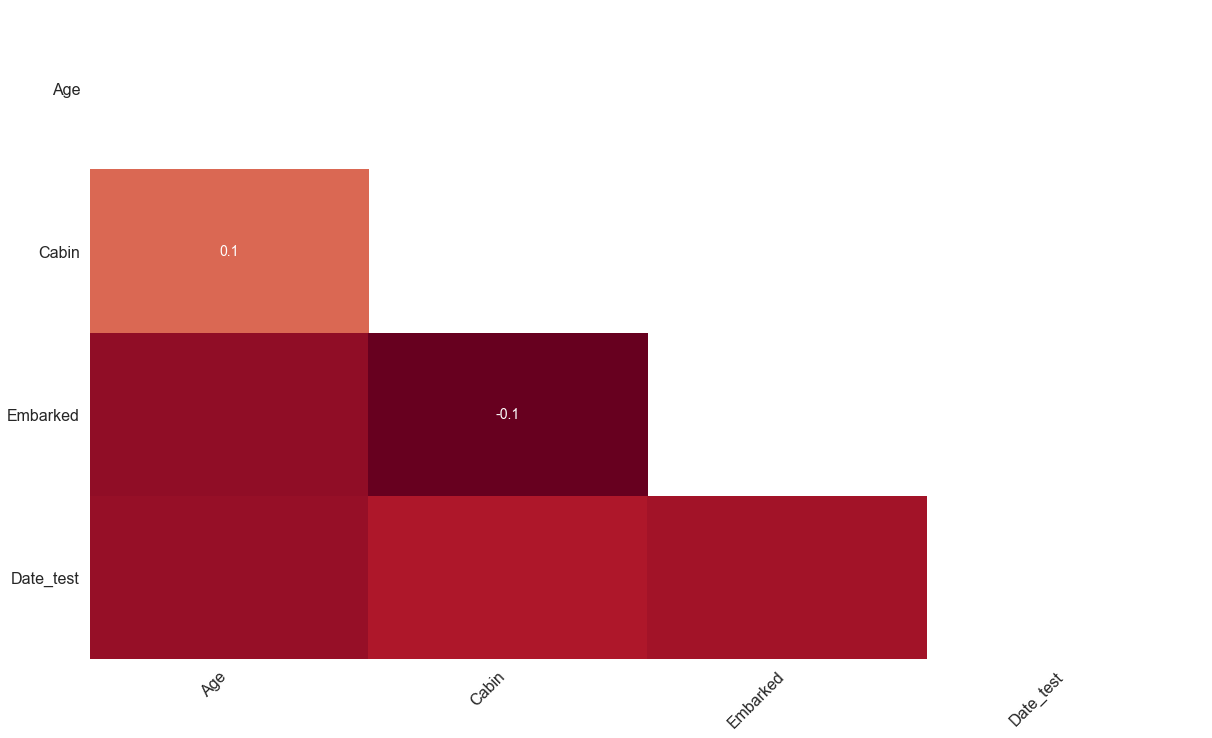

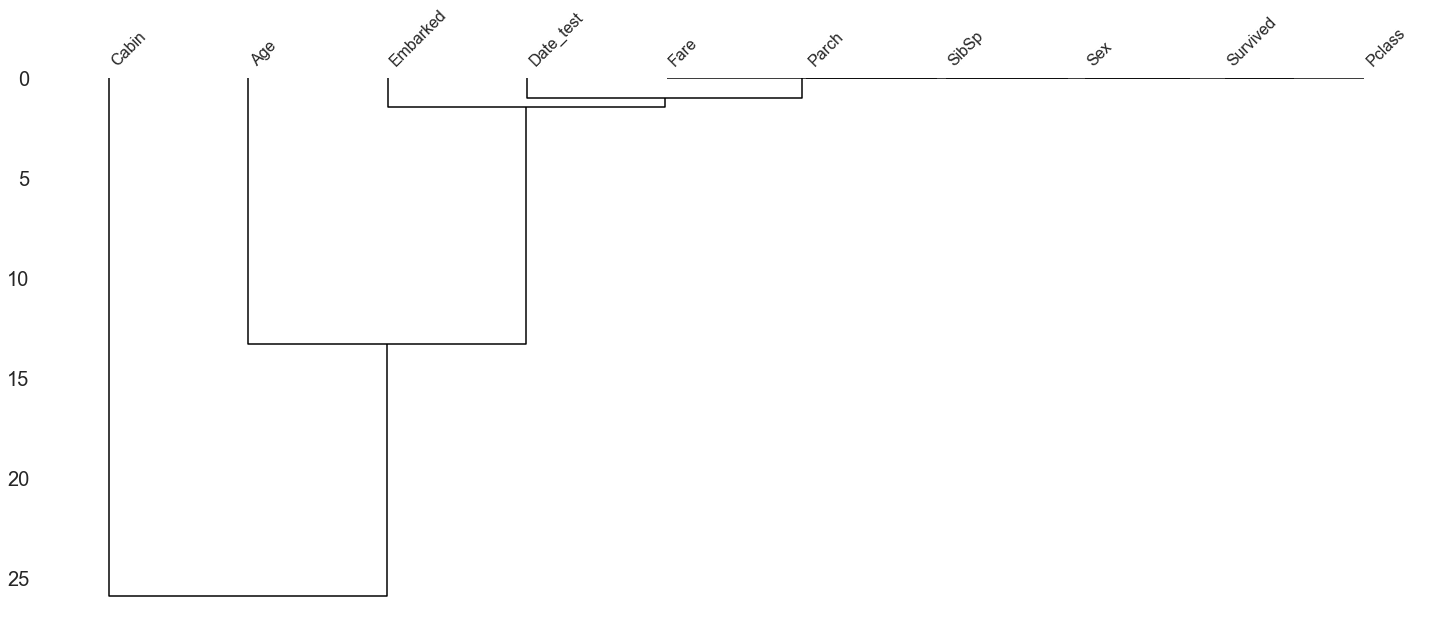

/Users/ericcacciavillani/Desktop/Coding/Python_Files/Artificial_Intelligence/Data Mining/eFlowMaster/Testing/eFlow Data/Pre processing/Data Cleaning/
Hit


In [18]:
data_cleaner = DataCleaner(df,
                           project_name=parent_project_name + "/" + "Data Cleaning",
                           missing_data_visuals=True)

In [19]:
data_cleaner.data_cleaning_widget(df,
                                  df_features)

Text(value='Default Data Cleaning', description='File Name:', layout=Layout(left='590px'), placeholder='Replac…

interactive(children=(Select(description='Features', layout=Layout(height='175px', width='50%'), options=('Age…

Button(description='Create JSON File from options', layout=Layout(bottom='5px', left='100px', width='40%'), st…

In [20]:
data_cleaner.get_last_saved_json_file_path()

AttributeError: 'DataCleaner' object has no attribute 'get_last_saved_json_file_path'

In [ ]:
data_cleaner.data_cleaning_with_json_file(df,
                                          data_cleaner.get_last_saved_json_file_path())

In [ ]:
from scipy import stats
df.reset_index(drop=True)
z_score_return = stats.zscore(((df["Age"].dropna())))
df["Age"].dropna()[(z_score_return >= -2) & (z_score_return <= 2)]

In [ ]:
from impyute.imputation.cs import mice

a = df["Age"].tolist()
# start the MICE training
imputed_training=mice(df.values)

In [ ]:
import datawig

df_train, df_test = datawig.utils.random_split(df)

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Cabin','Embarked'], # column(s) containing information about the column we want to impute
    output_column= 'Age', # the column we'd like to impute values for
    output_path = 'imputer_model' # stores model data and metrics
    )

#Fit an imputer model on the train data
imputer.fit(train_df=df, num_epochs=200)

In [ ]:
imputed_training=mice(df[df_features.get_numerical_features()].values)
imputed_training[0]

In [ ]:
# !pip install datawig
# !pip install opencv-python
# !pip install Pillow
# !pip install tesserocr

In [ ]:
import random
test = df.drop(columns=["Sex", "Date_test", "Embarked", "Cabin"]).dropna()

test[target_column] = [random.randint(0, 40) for _ in range(0,test.shape[0])]
print(len(test[target_column]))

y = test[target_column].values
X = test.values

print(X.shape)
print(y.shape)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=5187
)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from eFlow.ToolBox.Modeling import *
# Find best parameters for model
param_grid = {
    "max_depth": list(range(2, 8)),
    "min_samples_leaf": list(range(1, 35, 5)),
    "criterion": ["gini", "entropy"],
#     "n_splits": [10]
}

model, best_params = optimize_model_grid(
    model=DecisionTreeClassifier(),
    X_train=X_train, y_train=y_train,
    param_grid=param_grid
)
model

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict(X_test))

In [ ]:
from eFlow._Hidden.Objects.enum import enum
from eFlow.Utils.SysUtils import *
from eFlow.Utils.Constants import *

class SupervisedAnalysis:

    def __init__(self,
                 model,
                 X_train,
                 X_test,
                 y_train,
                 y_test,
                 model_name,
                 prediction_type="Classification",
                 project_name="Supervised Analysis",
                 overwrite_full_path=None,
                 notebook_mode=True,
                 normalize_confusion_matrix=True):
        
        # Init objectss by pass by refrence
#         self.__X_train = X_train
#         self.__X_test = X_test
#         self.__y_train = y_train
#         self.__y_test = y_test
        self.__model = model
        self.__model_name = copy.deepcopy(model_name)
        self.__notebook_mode = notebook_mode
        
#         skplt.metrics.plot_roc(y_train, y_train)

        # Setup project structure
        if not overwrite_full_path:
            parent_structure = "/" + SYS_CONSTANTS.PARENT_OUTPUT_FOLDER_NAME \
                               + "/" + project_name + "/"
            self.__PROJECT = enum(PATH_TO_OUTPUT_FOLDER=
                                  os.getcwd() + parent_structure)
        else:
            self.__PROJECT = enum(PATH_TO_OUTPUT_FOLDER=overwrite_full_path)
        
        if prediction_type == "Classifcation":
            
            self.confusion_matrix(X_train,
                                  y_train,
                                  title="Confusion Matrix: Training Data",
                                  normalize=normalize_confusion_matrix)
            
            self.confusion_matrix(X_test,
                                  y_test,
                                  title="Confusion Matrix: Testing Data",
                                  normalize=normalize_confusion_matrix)
            
            if len(set(y_train) | set(y_test)) == 2:
                self.__binary_classification = True
            else:
                self.__binary_classification = False

            try:
                y_probas = model.predict_proba(X_test)
                skplt.metrics.plot_roc(y_test, y_probas,figsize=(10,8))
                
                if self.__binary_classification:
                    skplt.metrics.plot_ks_statistic(y_test, y_probas,figsize=(10,8))
            except AttributeError:
                pass
            
        elif prediction_type == "Regression":
            pass
        else:
            print("ERROR")
        
    def confusion_matrix(self,
                         X,
                         y,
                         figsize=(10,8),
                         title=None,
                         filename=None,
                         normalize=True):
        
        if title:
            skplt.metrics.plot_confusion_matrix(self.__model.predict(X),
                                                y,
                                                figsize=figsize,
                                                title=title,
                                                normalize=normalize)
        else:
            skplt.metrics.plot_confusion_matrix(self.__model.predict(X),
                                                y,
                                                figsize=figsize,
                                                normalize=normalize)
        if filename:
            create_plt_png(self.__PROJECT.PATH_TO_OUTPUT_FOLDER,
                           self.__model_name,
                           filename)
        elif filename is None and title:
            create_plt_png(self.__PROJECT.PATH_TO_OUTPUT_FOLDER,
                           self.__model_name,
                           convert_to_file_name(title.replace(":", "").replace(" ", "_")))
        else:
            create_plt_png(self.__PROJECT.PATH_TO_OUTPUT_FOLDER,
                           self.__model_name,
                           "Confusion_Matrix")
            
        if self.__notebook_mode:
            plt.show()
        plt.close()

SupervisedAnalysis(model=model,
                   model_name=repr(model).split("(")[0],
                   X_train=X_train,
                   X_test=X_test,
                   y_train=y_train,
                   y_test=y_test,
                   project_name=parent_project_name + "/" + "SupervisedAnalysis",
                   prediction_type="Classifcation")

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from collections import defaultdict

In [ ]:
report = pd.DataFrame(classification_report(y_test,
                                            model.predict(X_test),output_dict=True))
report 

In [ ]:
type(df.values)

In [ ]:
df.values

In [ ]:
np.unique(df.values[:,0])